In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
marathon = pd.read_csv("./marathon_results_2017.csv", usecols=["Age","M/F","Country","40K"])
marathon["TimeSeconds"] = marathon["40K"].replace('-', 0).apply(lambda x: pd.Timedelta(x).total_seconds())
groupMF = marathon[ marathon["Country"].isin(["USA","CAN"]) ].groupby(by=["Country","M/F"])
groupMF = groupMF.agg({"TimeSeconds": ["mean"]})
groupMF = groupMF.unstack()
groupMF.columns = groupMF.columns.droplevel().droplevel()
groupMF

M/F,F,M
Country,,
CAN,13618.346012,12527.160190
USA,14187.362706,12998.130515


<Axes: xlabel='Country'>

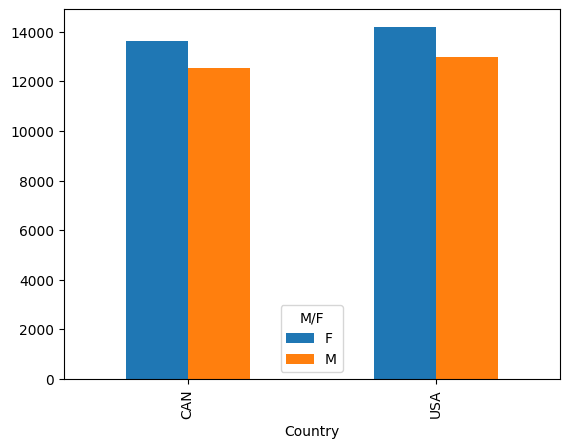

In [4]:
groupMF.plot(kind="bar")

<Axes: xlabel='Country'>

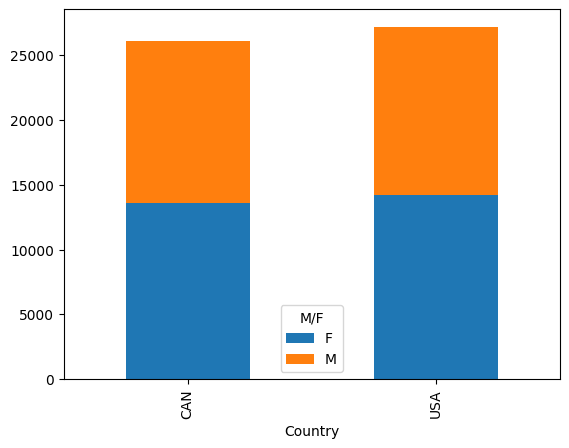

In [5]:
groupMF.plot(kind="bar", stacked=True)

<Axes: ylabel='Country'>

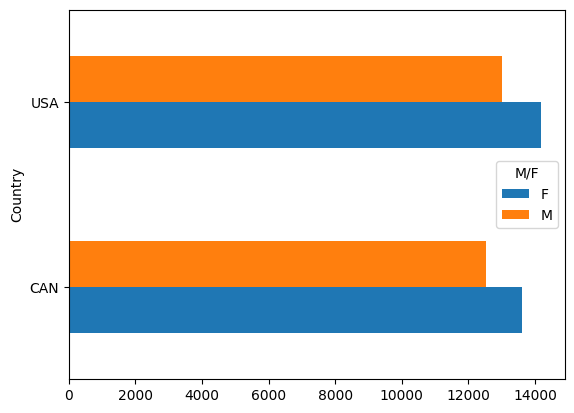

In [6]:
groupMF.plot(kind="barh")

In [7]:
age_data = marathon[ marathon["Country"].isin(["USA"]) ]
age_data.head()


,Age,M/F,Country,40K,TimeSeconds
1,30,M,USA,2:03:14,7394.0
3,32,M,USA,2:04:35,7475.0
5,40,M,USA,2:05:21,7521.0
6,33,M,USA,2:05:41,7541.0
8,27,M,USA,2:07:17,7637.0


<Axes: ylabel='Frequency'>

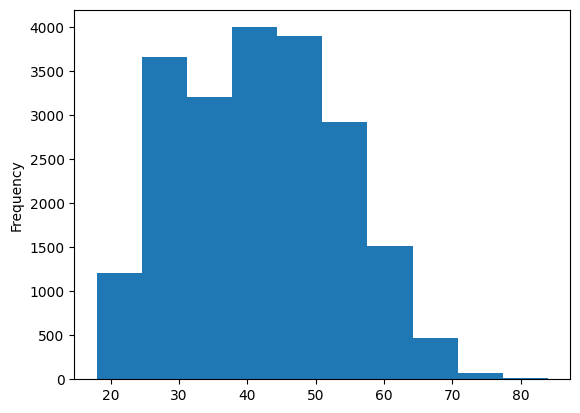

In [8]:
age_data["Age"].plot(kind="hist")


In [9]:
age_Count = age_data["Age"].nunique()
age_Count

66

<Axes: ylabel='Frequency'>

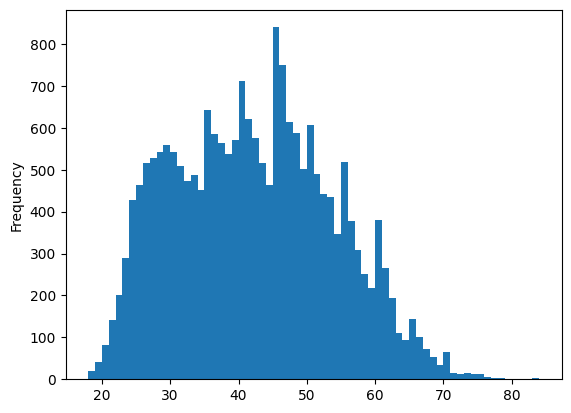

In [10]:
age_data["Age"].plot(kind="hist",bins=age_Count)

In [11]:
data_USA = marathon[ marathon["Country"].isin(["USA"]) ]
data_USA.head()

,Age,M/F,Country,40K,TimeSeconds
1,30,M,USA,2:03:14,7394.0
3,32,M,USA,2:04:35,7475.0
5,40,M,USA,2:05:21,7521.0
6,33,M,USA,2:05:41,7541.0
8,27,M,USA,2:07:17,7637.0


<Axes: >

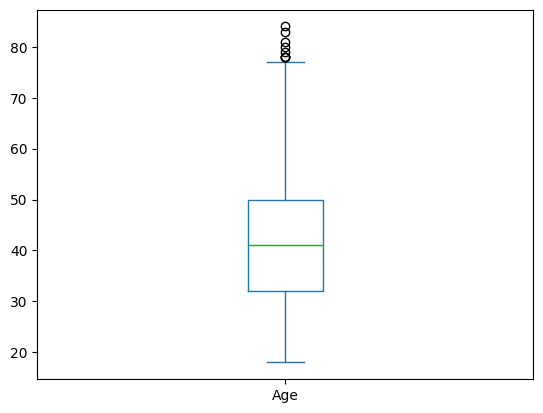

In [12]:
data_USA.plot(kind='box',y="Age")

In [13]:
USA = marathon[ marathon["Country"].isin(["USA"]) ]["Age"]
CAN = marathon[ marathon["Country"].isin(["CAN"]) ]["Age"]
df = pd.DataFrame({'USA':USA, 'CAN':CAN})
df.head()




,USA,CAN
1,30.0,NaN
3,32.0,NaN
5,40.0,NaN
6,33.0,NaN
8,27.0,NaN


<Axes: >

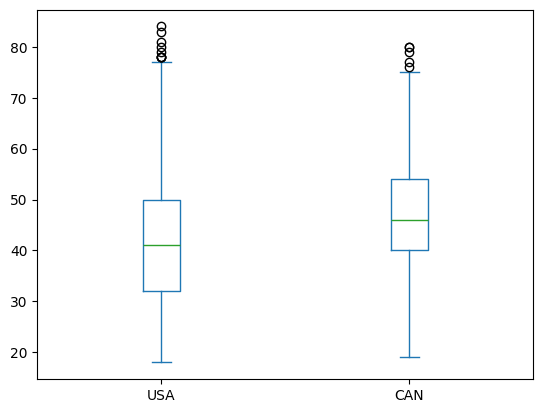

In [14]:
df.plot(kind = 'box')